<a href="https://colab.research.google.com/github/roshanedachali/TwitterAnalysis/blob/main/TextualSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [87]:
#IMPORT
import tweepy
import csv
! pip install jsonpickle
import jsonpickle
API_KEY="Q76360NUPSaax6Ic1MyPCqPhD"
API_SECRET="Ef5NJGN1GVJ6hwjOgh7Tv5NtOrBgipvE2umyrP37qkh8XWbOmC"
ACCESS_TOKEN="3180237764-o2OUouxEnigruw79ULQ2RrK78zbONdduBgScexi"
ACCESS_TOKEN_SECRET="yXCX26guHINaRHFCrlJmTTiSweTnlOTd67DDYdbJceQpl"
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Editing the CSV

In [88]:
import json
import csv
import io

from google.colab import drive
drive.mount('/content/drive')
with open('/content/LPApology.txt', 'r') as f: 
    print(f.read())

my_file = open("LPApology.txt", "r")
content = my_file.read()

apology_list = content.split(" ")
my_file.close()
print(apology_list)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Where do I begin...

Let's start with this -
I'm sorry.

This is a first for me. I've never faced
criticism like this before, because I've
never made a mistake like this before. I'm
surrounded by good people and believe I
make good decisions, but I'm still a human
being. I can be wrong.

I didn’t do it for views. I get views. I did it
because I thought I could make a positive
ripple on the internet, not cause a
monsoon of negativity. That's never the
intention. I intended to raise awareness for
suicide and suicide prevention and while I
thought “if this video saves just ONE life,
it'll be worth it,” I was misguided by shock
and awe, as portrayed in the video. I still
am.

I do this sh*t every day. I’ve made a 15
minute TV show EVERY SINGLE DAY for
the past 460+ days. One may understand
that it’s easy to get caught up in the
moment without fully weighing the
p

# Cleaning

In [89]:
index = len(apology_list)
print (index)
import re
i = 0
while ((i+1) <= index):
      apology_list[i]=re.sub(r'@[A-Z0-9a-z_:]+','',apology_list[i])#replace username-tags
      apology_list[i]=re.sub(r'^[RT]+','',apology_list[i])#replace RT-tags
      apology_list[i] = re.sub('https?://[A-Za-z0-9./]+','',apology_list[i])#replace URLs
      apology_list[i]=re.sub("[^a-zA-Z]", " ",apology_list[i])#replace hashtags
      i += 1
print(apology_list)
 


189
['Where', 'do', 'I', 'begin     Let s', 'start', 'with', 'this', '  I m', 'sorry   This', 'is', 'a', 'first', 'for', 'me ', 'I ve', 'never', 'faced criticism', 'like', 'this', 'before ', 'because', 'I ve never', 'made', 'a', 'mistake', 'like', 'this', 'before ', 'I m surrounded', 'by', 'good', 'people', 'and', 'believe', 'I make', 'good', 'decisions ', 'but', 'I m', 'still', 'a', 'human being ', 'I', 'can', 'be', 'wrong   I', 'didn t', 'do', 'it', 'for', 'views ', 'I', 'get', 'views ', 'I', 'did', 'it because', 'I', 'thought', 'I', 'could', 'make', 'a', 'positive ripple', 'on', 'the', 'internet ', 'not', 'cause', 'a monsoon', 'of', 'negativity ', 'hat s', 'never', 'the intention ', 'I', 'intended', 'to', 'raise', 'awareness', 'for suicide', 'and', 'suicide', 'prevention', 'and', 'while', 'I thought', ' if', 'this', 'video', 'saves', 'just', 'ONE', 'life  it ll', 'be', 'worth', 'it  ', 'I', 'was', 'misguided', 'by', 'shock and', 'awe ', 'as', 'portrayed', 'in', 'the', 'video ', 'I',

# Sentiment Analysis

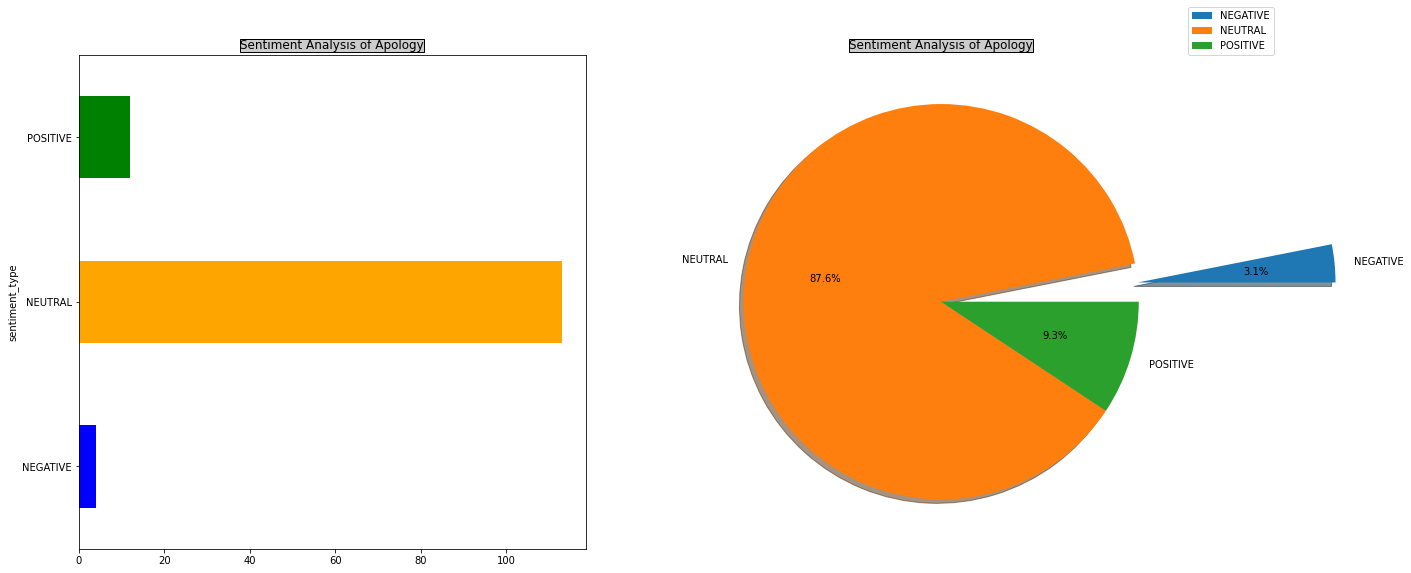

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.download('stopwords')
senti_score = []

## Lowercase all reviews
for i in range(len(apology_list)):
    apology_list[i] = apology_list[i].lower()

## Remove special characters
bad_chars = [';', ':', '!', "*", "@", "$", "^","&","(",")","?","=","/","%","rt "] 
import re
i = 0
x = 0
while ((i+1) <= len(apology_list)):
    while ((x+1 <= len(bad_chars))):
      if (apology_list[i] == bad_chars[x]):
        apology_list[i]=re.sub(r'bad_chars[x]','',apology_list[i])
        x += 1
      else: 
        x += 1
    i += 1

## Remove stop words 
! pip install stop-words
from stop_words import get_stop_words
from nltk.corpus import stopwords

for word in apology_list: # Removal 1
  if word in stopwords.words('english'): 
    apology_list.remove(word) 

apology_list = [word for line in apology_list for word in line.split()] #Split and find more stop words, if any

for word in apology_list: # Removal 2
  if word in stopwords.words('english'): 
    apology_list.remove(word) 

## Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
apology_list = [ps.stem(word) for word in apology_list]

print (apology_list)


## Sentiment Analysis
import numpy as np
import pandas as pd
import re
import warnings
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

#Generate word cloud for apology_list
import matplotlib.pyplot as plt
from wordcloud import WordCloud
unique_string=(" ").join(apology_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("apology"+".png", bbox_inches='tight')
plt.show()
plt.close()

#Sentiment of the apology
## Change the reviews type to string
apology_string = ' '.join([str(elem) for elem in apology_list])
print (apology_string)
import pandas as pd
  
# initialize list of lists
data = apology_list
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Words'])
  
# print dataframe.
df

sid = SentimentIntensityAnalyzer()
df['sentiment_compound_polarity']=df.Words.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.Words.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.Words.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.Words.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.head()

##Plot the findings of sentiment analysis
apology_sentiment = df.groupby(['sentiment_type'])['sentiment_neutral'].count()
apology_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
apology_sentiment.transpose().plot(kind='barh',figsize=(20, 20),color=['blue', 'orange', 'green'])
plt.title('Sentiment Analysis of Apology', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
apology_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis of Apology', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

